In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv('Food_Inspections_Clean.csv')
df.head()

,Inspection ID,DBA Name,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,month,day,year
0,1970470,IYANZE,Restaurant,1.0,4623-4627 N BROADWAY,60640.0,10/28/2016,Short Form Complaint,1.0,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.966063,-87.657734,10,28,2016
1,1970465,KENYATTA'S DAYCARE,Daycare Above and Under 2 Years,1.0,2334 E 75TH ST,60649.0,10/28/2016,License,0.0,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.759085,-87.567448,10,28,2016
2,1970461,DOMINOS,Restaurant,2.0,1234 S CANAL ST,60607.0,10/28/2016,Complaint Re-Inspection,0.0,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.866277,-87.639360,10,28,2016
3,1970431,ST JUDE EDUCATONAL INSTITUTE,Daycare (2 - 6 Years),1.0,2219 E 79TH ST,60649.0,10/28/2016,License,0.0,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.751569,-87.570283,10,28,2016
4,1970429,"FIRST SLICE, LLC",Restaurant,1.0,4401 N RAVENSWOOD AVE,60640.0,10/28/2016,Complaint,2.0,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.961619,-87.673833,10,28,2016


In [3]:
#describe the data
df.isnull().sum()

Inspection ID          0
DBA Name               0
Facility Type       4452
Risk                  76
Address                0
Zip                  105
Inspection Date        0
Inspection Type        1
Results            16282
Violations         27249
Latitude             479
Longitude            479
month                  0
day                    0
year                   0
dtype: int64

In [4]:
df.describe()

C:\Users\CORSAIR\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Inspection ID,Risk,Zip,Results,Latitude,Longitude,month,day,year
count,1.343840e+05,134308.000000,134279.000000,118102.000000,133905.000000,133905.000000,134384.000000,134384.000000,134384.000000
mean,1.129558e+06,1.409752,60629.055459,0.549279,41.879135,-87.675872,6.451259,15.739247,2012.990229
std,5.117647e+05,0.666438,39.520424,0.831157,0.081358,0.058491,3.319782,8.571820,1.927621
min,4.424700e+04,1.000000,60007.000000,0.000000,41.644670,-87.914428,1.000000,1.000000,2010.000000
25%,5.983028e+05,NaN,NaN,NaN,NaN,NaN,4.000000,8.000000,2011.000000
50%,1.307660e+06,NaN,NaN,NaN,NaN,NaN,6.000000,16.000000,2013.000000
75%,1.497662e+06,NaN,NaN,NaN,NaN,NaN,9.000000,23.000000,2015.000000
max,1.973212e+06,3.000000,66019.000000,2.000000,42.021064,-87.525094,12.000000,31.000000,2016.000000


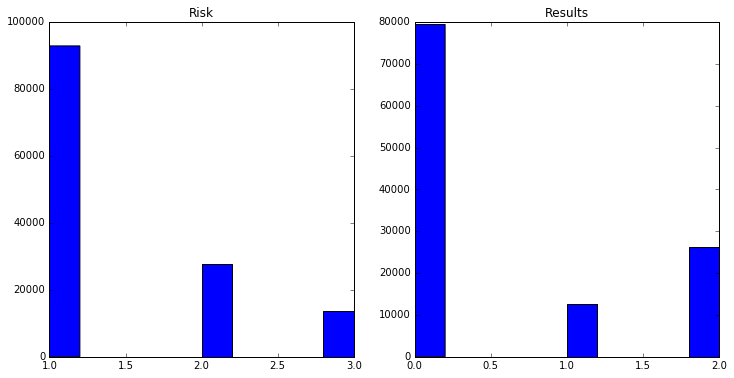

In [11]:
#histogram it up!

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.hist(df['Risk'][df['Risk'].notnull()])
ax.set_title('Risk')
ay = fig.add_subplot(122)
ay.hist(df['Results'][df['Results'].notnull()])
ay.set_title('Results')

plt.show()

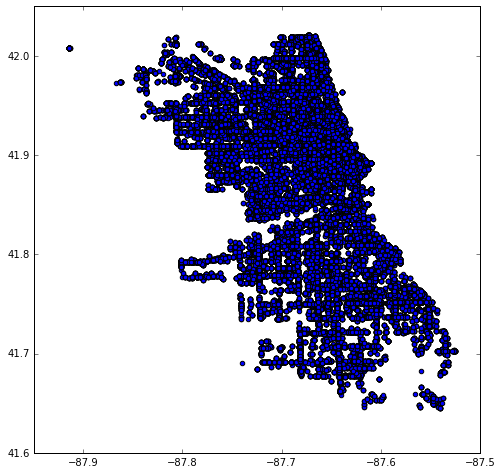

In [16]:
#explore lat long
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(df['Longitude'],df['Latitude'])
plt.show()

Looks like Chicago to me!